## Michael Alfarino B. P. - 10219111 - PR 2 SPSF

Sebuah partikel bermuatan q bergerak dengan kecepatan
$$ 
\vec{v(t)} = v_x(t)\hat{i} + v_y(t)\hat{j}
$$
dalam ruang bermedan magnetik konstan
$$
\vec{B}=-\hat{k}B_z
$$
Tentukan gerak partikel

#### a. Tuliskan hukum newtonnya

$$ \Sigma\vec{F}=m\vec{a} $$
$$ \vec{F_B}=m\vec{a} $$
Gaya magnetik yang dialami partikel adalah sebesar 
$$ \vec{F_B}= q\vec{v}\times\vec{B} = q(v_x(t)\hat{i} + v_y(t)\hat{j})\times(-\hat{k}B_z) $$
$$ = q(-v_y(t) B_z \hat{i} + v_x(t) B_z \hat{j}) $$
sehingga
$$ q(-v_y(t) B_z \hat{i} + v_x(t) B_z \hat{j})=m\frac{d\vec{v(t)}}{dt} $$

#### b. Tuliskan persamaan diferensial terkopel antara kecepatan pada kedua arah

Tinjau tiap komponen dari persamaan diferensial, sehingga diperoleh persamaan sebagai berikut
$$ \frac{-qB_z}{m}v_y(t)=\frac{dv_x(t)}{dt} $$
$$ \frac{qB_z}{m}v_x(t)=\frac{dv_y(t)}{dt} $$

#### c. Selesaikan kedua persamaan diferensial sehingga dapat diperoleh $v_x(t), v_y(t), x(t), $ dan $y(t)$, lakukan secara teori

Diferensialkan persamaan pertama, sehingga diperoleh
$$ \frac{d^{2}v_x(t)}{dt^{2}} =\frac{-qB_z}{m}\frac{dv_y(t)}{dt} $$
Substitusikan persamaan kedua, sehingga diperoleh
$$ \frac{d^{2}v_x(t)}{dt^{2}} =-\left(\frac{qB_z}{m}\right)^{2}v_x(t) $$
Dengan cara yang sama, diferensialkan persamaan kedua dan substitusikan persamaan pertama, sehingga diperoleh
$$ \frac{d^{2}v_y(t)}{dt^{2}} =\frac{qB_z}{m}\frac{dv_x(t)}{dt} $$
$$ \frac{d^{2}v_y(t)}{dt^{2}} =-\left(\frac{qB_z}{m}\right)^{2}v_y(t) $$

Penyelesaian persamaan tersebut adalah sebagai berikut
$$ v_x(t) = k_1 \sin{\left(\frac{qB_z}{m}t\right)} + k_2 \cos{\left(\frac{qB_z}{m}t\right)} $$
$$ v_y(t) = k_3 \sin{\left(\frac{qB_z}{m}t\right)} + k_4 \cos{\left(\frac{qB_z}{m}t\right)} $$
Persamaan pertama dapat ditulis juga sebagai
$$ v_x(t) = A\sin{\left(\frac{qB_z}{m}t+\phi\right)} $$
dengan amplitudo $A$ dan beda fasa $\phi$ merupakan sembarang konstanta, kemudian dari persamaan diferensial terkopel pertama diperoleh
$$ v_y(t) = -A\cos{\left(\frac{qB_z}{m}t+\phi\right)} $$
dengan nilai $A$ dan $\phi$ yang sama

Tinjau bahwa $v_x^{2} + v_y^{2} = A^{2}$ sehingga, ketika $v_z=0$, $A$ merupakan kecepatan tangensial dari rotasi partikel

Jika diasumsikan $A=10$, $\phi=0$, serta $ q=1,\ B_z=1,\ m=1 $, maka dapat dibuat grafik dari $v_x=10\sin{\left(t\right)}$ dan $v_y=-10\cos{\left(t\right)}$ seperti berikut

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

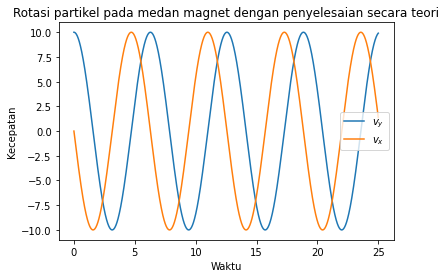

In [ ]:
t=np.arange(0, 25, 0.005)

plt.figure()
plt.plot(t, 10*np.cos(t), t, -10*np.sin(t))
plt.title('Rotasi partikel pada medan magnet dengan penyelesaian secara teori')
plt.xlabel('Waktu')
plt.ylabel('Kecepatan')
plt.legend(['$v_y$', '$v_x$'])

plt.show()

#### d. Perolehkan solusi numeriknya

Dengan menyelesaikan persamaan diferensial terkopel
$$ \frac{dv_x(t)}{dt}=\frac{-qB_z}{m}v_y(t) $$
$$ \frac{dv_y(t)}{dt}=\frac{qB_z}{m}v_x(t) $$
secara numerik menggunakan metode Runge-Kutta orde ke 4, dan dengan menggunakan asumsi
$$ q=1,\ B_z=1,\ m=1 $$
diperoleh

In [ ]:
def rk4(F,t,x,y,h): #metode Runge-Kutta
    K0 = h*F(t,x,y)
    K1 = h*F(t + h/2.0, x + K0/2.0, y)
    K2 = h*F(t + h/2.0, x + K1/2.0, y)
    K3 = h*F(t +h, x + K2, y)
    return (K0 + 2.0*K1 + 2.0*K2 + K3)/6.0

# definisi persamaan diferensial terkopel
def vx_dot(t,vx,vy,q=1, Bz=1, m=1):
  return -q*Bz/m*vy

def vy_dot(t,vy,vx,q=1, Bz=1, m=1):
  return q*Bz/m*vx

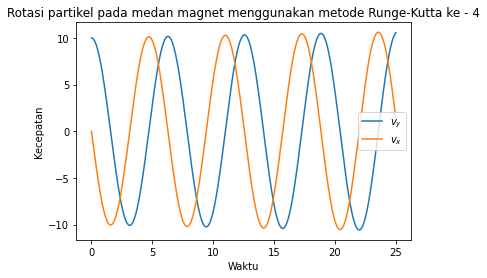

In [ ]:
# kondisi awal
vx_init = 0 #kecepatan tangensial dari rotasi
vy_init = 10 
t_init = 0
t_stop = 25
h = 0.005

vxs=[vx_init]
vys=[vy_init]
ts=[t_init]

#iterasi metode runge-kutta
while ts[-1] < t_stop:
    h = min(h, t_stop - ts[-1])
    vx = vxs[-1] + rk4(vx_dot,ts[-1],vxs[-1],vys[-1],h)
    vy = vys[-1] + rk4(vy_dot,ts[-1],vys[-1],vxs[-1],h)
    t = ts[-1] + h
    ts.append(t)
    vxs.append(vx)
    vys.append(vy)

#plot kecepatan pada arah x dan y tiap waktu
plt.figure()
plt.plot(ts,vys,ts,vxs)
plt.title('Rotasi partikel pada medan magnet menggunakan metode Runge-Kutta ke - 4')
plt.xlabel('Waktu')
plt.ylabel('Kecepatan')
plt.legend(['$v_y$', '$v_x$'])

plt.show()

#### e. Bandingkan hasil kedua pendekatan, teori dan numerik

Pendekatan teori dan numerik memiliki hasil yang sama